In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import os
import numpy as np
from formatData import loadData
from sklearn.model_selection import train_test_split
from coulombToTraj import *

In [11]:
xyz_files_dir_name = "/home/panthibivek/thesis/GAN_pkg/data/AllMolecules/"
xyz_traj_filename = "/home/panthibivek/thesis/GAN_pkg/data/traj.xyz"
print("Loading Lower Coulomb representation and respective energies")
molRep2D, _ = loadData(12, xyz_traj_filename)

molRep2D_without_diagonal = []
diagonal_index = [1,3,6,10,15,21,28,36,45,55,66,78]
index = np.array([i-1 for i in range(1,78) if i not in diagonal_index])

for each_molRep2D in molRep2D:
    each_molRep2D_without_diagonal = each_molRep2D[index]
    molRep2D_without_diagonal.append(each_molRep2D_without_diagonal)
molRep2D_without_diagonal = np.array(molRep2D_without_diagonal)

# charge of all atoms in benzene
atomic_charge = np.repeat(np.array([[6,6,6,6,6,6,1,1,1,1,1,1]]), len(molRep2D), axis=0)
molRep2D_with_atomic_charge = np.concatenate((atomic_charge, molRep2D_without_diagonal), axis=1)

flatened_xyz = np.array(getFlattenedXyz(xyz_files_dir_name))
X_train, X_test, y_train, y_test = train_test_split(molRep2D_with_atomic_charge, flatened_xyz,
                                test_size=0.7)
model = getModel()
history = model.fit(X_train, y_train, epochs=100)

Loading Lower Coulomb representation and respective energies
input data size: (10000, 78)
output data size: (10000,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1024)              80896     
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 64)                32832     
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 36)                2340      
   

2023-03-20 12:29:45.402863: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-20 12:29:45.411646: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-20 12:29:45.419076: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-20 12:29:45.424788: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-20 12:29:45.428617: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-20 12:29:45.431491: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


24/94 [======>.......................] - ETA: 0s - loss: 102.2140

2023-03-20 12:29:45.930695: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


94/94 [==============================] - 1s 6ms/step - loss: 28.6863
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 2.5874
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 2.5615
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 2.5390
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 2.5324
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 2.5037
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 2.5086
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 2.5170
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 2.4681
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 2.4847
Epoch 11/100
94/94 [==============================] - 0s 4ms/step - loss: 2.4812
Epoch 12/100
94/94 [==============================] - 0s 4ms/step - loss: 2.5140
Epoch 13/100
94/94 [============================

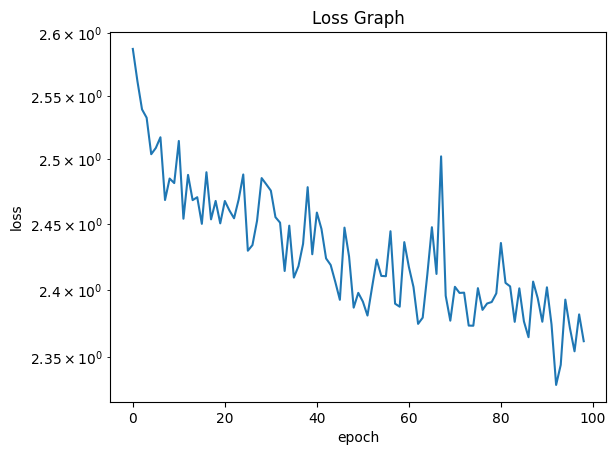

In [17]:
from matplotlib import pyplot as plt
loss_arr = history.history['loss']
plt.plot(loss_arr[1:])
plt.yscale('log')
plt.title('Loss Graph')
plt.ylabel('loss')
plt.xlabel('epoch')
# fig1 = plt.gcf()
plt.show()

In [13]:
result = model.predict(X_test)
print(result[0])
print(y_test[0])
print(np.sum(np.sum((y_test - result) ** 2, 0), 0)/len(result))

120/219 [===============>..............] - ETA: 0s

2023-03-20 12:30:25.385459: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-20 12:30:25.395717: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-20 12:30:25.400801: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-20 12:30:25.405256: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-20 12:30:25.408918: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-20 12:30:25.411122: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-20 12:30:25.434777: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


219/219 [==============================] - 0s 879us/step
[-3.0077884   2.3390934  -2.4781291  -1.9255536   2.5923223  -2.464644
 -1.2699513   2.8987324  -2.4127557  -2.507093    3.7851171  -2.6284494
 -3.5671704   2.9268367  -2.1499412  -4.067869    2.8886266  -2.447416
 -3.540088    1.8630013  -2.2544765  -1.0515238   2.2742062  -2.850215
 -0.16997343  2.8846712  -2.9932468  -1.7097683   4.127443   -2.6409392
 -4.357032    3.7804697  -2.0626369  -4.768638    3.0326164  -1.8715848 ]
[-4.74791  3.38049 -3.65548 -3.42585  3.35748 -4.04109 -2.7302   4.56045
 -4.15446 -3.45175  5.73135 -3.99129 -4.76423  5.8056  -3.59869 -5.46476
  4.57475 -3.49042 -5.26082  2.43799 -3.44367 -2.95376  2.37243 -4.1646
 -1.69786  4.53733 -4.35453 -2.9107   6.69902 -3.92837 -5.26961  6.73558
 -3.28506 -6.49852  4.65132 -3.16646]
84.4635275246317
